## Поведение клиентов федерального оператора сотовой связи

### Рассмотрим общую информацию из датасетов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
from math import ceil as math

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Рассмотрим звонки

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [6]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [7]:
calls.duplicated().sum()

0

In [8]:
len(calls[calls.duration < 1])

47927

Вывод по звонкам

Пропусков и дубликатов в датасете нет, столбец call_date необходимо поменять тип на DateTime. Количество звонков длительностью менее 1 мин - 47927, можно применить метод np.ceil для округления в большую сторону всех значений.

### Рассмотрим интернет

In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [11]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [12]:
internet.duplicated().sum()

0

In [13]:
len(internet.query('mb_used < 1 and mb_used > 0'))

101

In [14]:
len(internet.query('mb_used < 1 '))

19699

Вывод по интернету

Пустых значений и дубликатов нет, тип данных в столбце session_date поменять на DateTime. Также, можно удалить столбец unnamed (дубликат индексации). Количество сессий с объемом потраченного трафика менее 1 Мб - 19699, количество сессий с объемом потраченного трафика от 0 Мб до 1 Мб - 101 , можно применить метод np.ceil для округления всех значений в большую сторону.

### Рассмотрим сообщения

In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [17]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [18]:
messages.duplicated().sum()

0

Вывод по сообщекниям

Пустых значенийи и дубликатов нет, тип данных для столбца message_date заменим на DateTime

### Рассмотрим тарифы

In [19]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [20]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [22]:
tariffs.duplicated().sum()

0

Вывод по тарифам

Пустых значений и дубликатов нет, тип данных везде корректный

### Рассмотрим пользователей

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [25]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [26]:
users.duplicated().sum()

0

In [27]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Вывод по пользователям

Дубликатов нет, но есть пустые значения в столбце churn_date. Тип данных для столбцов churn_date и reg_date поменять на DateTime. пменять регистр на нижний в city, first_name, last_name. Из 500 пользователей у 351 тариф смарт, а у 149 - ультра

### Вывод по общей информации

Во всех датасетах 0 пропусков, в одном датасете решить вопрос с дубликатами, в одном датасете удалить столбец. Необходимо будет поменять тип данных. В ряде случаев необходимо округление значений.

## Подготовка данных

Поменяем тип данных

In [28]:
calls['id'] = calls['id'].astype('int64')
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [29]:
calls.dtypes

id                    int64
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [30]:
messages['id'] = messages['id'].astype('int64')
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [31]:
messages.dtypes

id                       int64
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [32]:
users['city'] = users['city'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()

In [33]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [34]:
internet['id'] = internet['id'].astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [35]:
internet.drop('Unnamed: 0', axis = 'columns', inplace = True)

In [36]:
internet.dtypes

id                       int64
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Округлим значения в данных

In [37]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls['duration'] == 0 ,'duration'] = 1
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.loc[internet['mb_used'] == 0 ,'mb_used'] = 1

In [38]:
calls['duration'] = calls['duration'].astype('int64')
internet['mb_used'] = internet['mb_used'].astype('int64')

### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам

In [39]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_per_month = calls.pivot_table(index=['month', 'user_id'], values='duration', aggfunc=['count', 'sum'])
calls_per_month

count      sum
              duration duration
month user_id                  
1     1005          15       99
      1032          61      397
      1045           1        9
      1055          64      568
      1071          24      200
...                ...      ...
12    1494          62      426
      1495         155     1066
      1496          80      533
      1497          71      558
      1499          69      505

[3174 rows x 2 columns]

In [40]:
user_cost = pd.DataFrame()  # создаем датафрейм для анализа каждого пользователя
tmp_df = pd.DataFrame(calls_per_month.to_records()) 

user_cost['user_id'] = tmp_df['user_id']
user_cost['month']   = tmp_df['month']
user_cost['calls']   = tmp_df.iloc[:, 2]
user_cost['minutes'] = tmp_df.iloc[:, 3]

### Расчет количества отправленных сообщений по месяцам

In [41]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_per_month = messages.pivot_table(index=['month','user_id'], values='id', aggfunc='count')
messages_per_month

id
month user_id    
1     1005      7
      1032     38
      1045      5
      1055     30
      1071     16
...            ..
12    1493     78
      1495     84
      1496     51
      1497     17
      1499     66

[2717 rows x 1 columns]

In [42]:
tmp_df = pd.DataFrame(messages_per_month.to_records()).rename(columns={'id': 'messages'})
user_cost = user_cost.merge(tmp_df, on=['user_id', 'month'], how='outer')

### Расчет объема израсходованного интернет-трафика по месяцам

In [43]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_per_month = internet.pivot_table(index=['month','user_id'], values='mb_used', aggfunc='sum')
internet_per_month

mb_used
month user_id         
1     1005        2730
      1032       24158
      1045        2348
      1055       17115
      1071       15625
...                ...
12    1494       17650
      1495       23451
      1496       20770
      1497       19946
      1499       13082

[3203 rows x 1 columns]

In [44]:
tmp_df = pd.DataFrame(internet_per_month.to_records())
user_cost = user_cost.merge(tmp_df, on=['user_id', 'month'], how='outer')

In [45]:
user_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3174 non-null float64
minutes     3174 non-null float64
messages    2717 non-null float64
mb_used     3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


В одном датафрйме сейчас можно увидеть следующую информацию по пользователям в разрезе месяца - количество сделанных звонков и израсходованных минут разговора; количество отправленных сообщений и объем израсходованного интернет-трафика в Мб

Так как есть пользователи, которые пользовались не всеми услугами в некоторые месяцы, появились пропуски (заполняем их нулями). 

In [46]:
to_integer = ['calls', 'minutes', 'messages', 'mb_used']
for x1 in to_integer:
    user_cost[x1] = user_cost[x1].fillna(0).astype('int64')

In [47]:
user_cost.head(10)

,user_id,month,calls,minutes,messages,mb_used
0,1005,1,15,99,7,2730
1,1032,1,61,397,38,24158
2,1045,1,1,9,5,2348
3,1055,1,64,568,30,17115
4,1071,1,24,200,16,15625
5,1113,1,18,115,14,768
6,1120,1,5,56,0,657
7,1126,1,35,279,4,16378
8,1134,1,42,341,32,10218
9,1135,1,9,90,1,1602


### Расчет помесячной выручки с каждого пользователя

необходимо добавить в датафрейм информацию о пользователях и тарифах

In [48]:
# из-за наличия дубликата переименуем название одного столбца
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [49]:
user_cost = user_cost.merge(users, on = 'user_id', how = 'left').merge(tariffs, on = 'tariff', how = 'left')

In [50]:
# выявим перерасход минут, сообщений и мб
user_cost['minutes_over']  = user_cost['minutes'] - user_cost['minutes_included']
user_cost['messages_over'] = user_cost['messages'] - user_cost['messages_included']
user_cost['mb_used_over']  = user_cost['mb_used'] - user_cost['mb_per_month_included']

In [51]:
user_cost.head(10)

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over
0,1005,1,15,99,7,2730,67,NaT,набережные челны,афанасий,...,50,15360,500,550,200,3,3,-401,-43,-12630
1,1032,1,61,397,38,24158,31,NaT,ульяновск,инна,...,50,15360,500,550,200,3,3,-103,-12,8798
2,1045,1,1,9,5,2348,48,NaT,улан-удэ,джемма,...,50,15360,500,550,200,3,3,-491,-45,-13012
3,1055,1,64,568,30,17115,39,NaT,казань,луиза,...,50,15360,500,550,200,3,3,68,-20,1755
4,1071,1,24,200,16,15625,20,2018-08-31,омск,гектор,...,50,15360,500,550,200,3,3,-300,-34,265
5,1113,1,18,115,14,768,52,NaT,чита,харитон,...,50,15360,500,550,200,3,3,-385,-36,-14592
6,1120,1,5,56,0,657,25,NaT,краснодар,агнесса,...,1000,30720,3000,1950,150,1,1,-2944,-1000,-30063
7,1126,1,35,279,4,16378,71,NaT,санкт-петербург,яна,...,1000,30720,3000,1950,150,1,1,-2721,-996,-14342
8,1134,1,42,341,32,10218,65,NaT,красноярск,марьяна,...,50,15360,500,550,200,3,3,-159,-18,-5142
9,1135,1,9,90,1,1602,64,NaT,архангельск,милена,...,50,15360,500,550,200,3,3,-410,-49,-13758


В данном случае если значение + , это перерасход, если значение - , это в рамках тарифа

In [52]:
# функция расчета стоимости дополнительных минут, сообщений и мб
def month_price(row):
    min_price = 0
    mess_price = 0
    mb_price = 0    
    # стоимость дополнительных минут, остаток умножаемм на значение из тарифного плана
    if row['minutes_over'] > 0:
        min_price = row['minutes_over'] * row['rub_per_minute']
    # стоимость дополнительных сообщений, остаток умножаемм на значение из тарифного плана
    if row['messages_over'] > 0:
        mess_price = row['messages_over'] * row['rub_per_message']
    # стоимость дополнительного трафика, остаток умножаемм на значение из тарифного плана
    if row['mb_used_over'] > 0:
        mb_price = (row['mb_used_over'] / 1024) * row['rub_per_gb']    
    return min_price + mess_price + mb_price

In [53]:
user_cost['overlimit_rub_per_month'] = user_cost.apply(month_price, axis=1)
user_cost['total_rub_per_month'] = user_cost['rub_monthly_fee'] + user_cost['overlimit_rub_per_month']

In [54]:
user_cost.head(10)

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over,overlimit_rub_per_month,total_rub_per_month
0,1005,1,15,99,7,2730,67,NaT,набережные челны,афанасий,...,500,550,200,3,3,-401,-43,-12630,0.000000,550.000000
1,1032,1,61,397,38,24158,31,NaT,ульяновск,инна,...,500,550,200,3,3,-103,-12,8798,1718.359375,2268.359375
2,1045,1,1,9,5,2348,48,NaT,улан-удэ,джемма,...,500,550,200,3,3,-491,-45,-13012,0.000000,550.000000
3,1055,1,64,568,30,17115,39,NaT,казань,луиза,...,500,550,200,3,3,68,-20,1755,546.773438,1096.773438
4,1071,1,24,200,16,15625,20,2018-08-31,омск,гектор,...,500,550,200,3,3,-300,-34,265,51.757812,601.757812
5,1113,1,18,115,14,768,52,NaT,чита,харитон,...,500,550,200,3,3,-385,-36,-14592,0.000000,550.000000
6,1120,1,5,56,0,657,25,NaT,краснодар,агнесса,...,3000,1950,150,1,1,-2944,-1000,-30063,0.000000,1950.000000
7,1126,1,35,279,4,16378,71,NaT,санкт-петербург,яна,...,3000,1950,150,1,1,-2721,-996,-14342,0.000000,1950.000000
8,1134,1,42,341,32,10218,65,NaT,красноярск,марьяна,...,500,550,200,3,3,-159,-18,-5142,0.000000,550.000000
9,1135,1,9,90,1,1602,64,NaT,архангельск,милена,...,500,550,200,3,3,-410,-49,-13758,0.000000,550.000000


In [55]:
smart = user_cost.query("tariff == 'smart'")

In [56]:
len(smart.groupby('user_id'))

350

In [57]:
ultra = user_cost.query("tariff == 'ultra'")

In [58]:
len(ultra.groupby('user_id'))

148

### Вывод по предобработке данных

Данные стали с корректным типом, лишние столбцы удалены, решен вопрос с пропусками, количество пользователей с тарифом смарт = 350, с тарифом ультра = 148 

## Анализ данных

Поведение клиентов оператора исходя из выборки

In [59]:
list_ = ['minutes', 'messages', 'mb_used', 'overlimit_rub_per_month', 'total_rub_per_month']
tariff_per_month = user_cost.pivot_table(index = ['tariff', 'month'], values = list_)

In [60]:
smart_cost = tariff_per_month.loc['smart']

In [61]:
smart_cost

,mb_used,messages,minutes,overlimit_rub_per_month,total_rub_per_month
month,,,,,
1,8528.588235,18.235294,209.647059,154.895910,704.895910
2,11617.344828,24.086207,306.310345,262.159752,812.159752
3,15131.207792,31.857143,400.532468,583.213271,1133.213271
4,13486.080357,30.741071,377.000000,384.781878,934.781878
5,15832.751773,33.773050,398.404255,611.004377,1161.004377
6,15822.445122,33.402439,406.701220,614.601038,1164.601038
7,15771.398010,33.751244,419.288557,635.629392,1185.629392
8,16640.212766,33.638298,433.191489,726.647008,1276.647008
9,16332.615385,33.638462,440.080769,667.753456,1217.753456


In [62]:
ultra_cost = tariff_per_month.loc['ultra']

In [63]:
ultra_cost

,mb_used,messages,minutes,overlimit_rub_per_month,total_rub_per_month
month,,,,,
1,13154.666667,33.777778,440.888889,0.000000,1950.000000
2,11788.333333,21.958333,304.666667,23.095703,1973.095703
3,17553.513514,32.297297,503.081081,54.254645,2004.254645
4,16845.254545,31.563636,470.072727,45.474077,1995.474077
5,19383.194030,37.850746,524.865672,105.022738,2055.022738
6,18943.928571,41.726190,492.428571,82.109724,2032.109724
7,20516.571429,49.846154,560.296703,158.562092,2108.562092
8,19595.878505,48.439252,524.570093,121.230195,2071.230195
9,19224.043478,52.286957,553.643478,63.776749,2013.776749


In [64]:
#Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
tariff_count = tariff_per_month.pivot_table(index = 'tariff', values = list_)

In [65]:
tariff_count

,mb_used,messages,minutes,overlimit_rub_per_month,total_rub_per_month
tariff,,,,,
smart,15085.107080,31.413211,397.374228,595.673948,1145.673948
ultra,18224.477581,43.714983,509.356551,88.972927,2038.972927


### Дисперсия и стандартное отклонение

#### Количество минут

In [66]:
smart['minutes'].describe()

count    2229.000000
mean      429.450875
std       194.871174
min         0.000000
25%       291.000000
50%       435.000000
75%       560.000000
max      1471.000000
Name: minutes, dtype: float64

In [67]:
ultra['minutes'].describe()

count     985.000000
mean      540.779695
std       325.738740
min         0.000000
25%       292.000000
50%       532.000000
75%       773.000000
max      1727.000000
Name: minutes, dtype: float64

In [68]:
smart_var = round(np.var(smart['minutes']))
ultra_var = round(np.var(ultra['minutes']))
print('Дисперсия тарифа Cмарт по минутам: {}'.format(smart_var))
print('Дисперсия тарифа Ультра по минутам: {}'.format(ultra_var))

Дисперсия тарифа Cмарт по минутам: 37958
Дисперсия тарифа Ультра по минутам: 105998


In [69]:
smart_std = round(smart['minutes'].std())
ultra_std = round(ultra['minutes'].std())
print('Стандартное отклонение тарифа Cмарт по минутам: {}'.format(smart_std))
print('Стандартное отклонение тарифа Ультра по минутам: {}'.format(ultra_std))

Стандартное отклонение тарифа Cмарт по минутам: 195
Стандартное отклонение тарифа Ультра по минутам: 326


In [70]:
def hist_tariffs(column, title):
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,6))
    plt.title(title, fontsize=20)
    sns.distplot(smart[column], label='Смарт', kde=False)
    sns.distplot(ultra[column], label='Ultra', kde=False)
    plt.axvline(np.mean(smart[column]),color = 'r', linestyle = '-', label='Смарт среднее')
    plt.axvline(np.mean(ultra[column]),color = 'r', linestyle = '--', label='Ultra среднее')
    plt.legend()

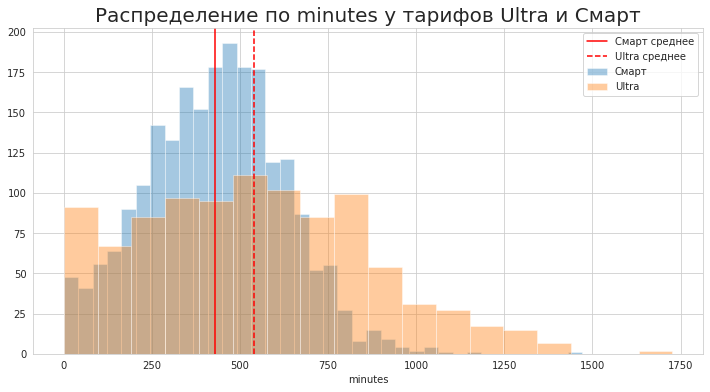

In [71]:
hist_tariffs('minutes', 'Распределение по minutes у тарифов Ultra и Смарт')

#### Количество сообщений

In [72]:
smart['messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [73]:
ultra['messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

In [74]:
smart_var_mes = round(np.var(smart['messages']))
ultra_var_mes = round(np.var(ultra['messages']))
print('Дисперсия тарифа Cмарт по сообщениям: {}'.format(smart_var_mes))
print('Дисперсия тарифа Ультра по сообщениям: {}'.format(ultra_var_mes))

Дисперсия тарифа Cмарт по сообщениям: 796
Дисперсия тарифа Ультра по сообщениям: 2283


In [75]:
smart_std_mes = round(smart['messages'].std())
ultra_std_mes = round(ultra['messages'].std())
print('Стандартное отклонение тарифа Cмарт по минутам: {}'.format(smart_std_mes))
print('Стандартное отклонение тарифа Ультра по минутам: {}'.format(ultra_std_mes))

Стандартное отклонение тарифа Cмарт по минутам: 28
Стандартное отклонение тарифа Ультра по минутам: 48


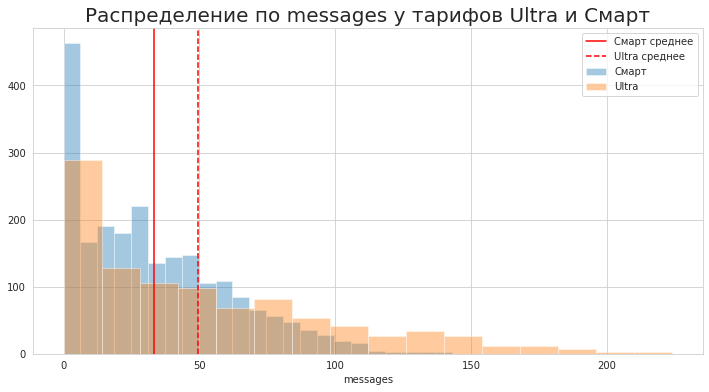

In [76]:
hist_tariffs('messages', 'Распределение по messages у тарифов Ultra и Смарт')

#### Количесто Мб

In [77]:
smart['mb_used'].describe()

count     2229.000000
mean     16237.184388
std       5879.795158
min          0.000000
25%      12662.000000
50%      16540.000000
75%      20078.000000
max      38627.000000
Name: mb_used, dtype: float64

In [78]:
ultra['mb_used'].describe()

count      985.000000
mean     19488.703553
std      10097.107541
min          0.000000
25%      11787.000000
50%      19324.000000
75%      26866.000000
max      49793.000000
Name: mb_used, dtype: float64

In [79]:
smart_var_mb = round(np.var(smart['mb_used']))
ultra_var_mb = round(np.var(ultra['mb_used']))
print('Дисперсия тарифа Cмарт по сообщениям: {}'.format(smart_var_mb))
print('Дисперсия тарифа Ультра по сообщениям: {}'.format(ultra_var_mb))

Дисперсия тарифа Cмарт по сообщениям: 34556481
Дисперсия тарифа Ультра по сообщениям: 101848077


In [80]:
smart_std_mb = round(smart['mb_used'].std())
ultra_std_mb = round(ultra['mb_used'].std())
print('Стандартное отклонение тарифа Cмарт по минутам: {}'.format(smart_std_mb))
print('Стандартное отклонение тарифа Ультра по минутам: {}'.format(ultra_std_mb))

Стандартное отклонение тарифа Cмарт по минутам: 5880
Стандартное отклонение тарифа Ультра по минутам: 10097


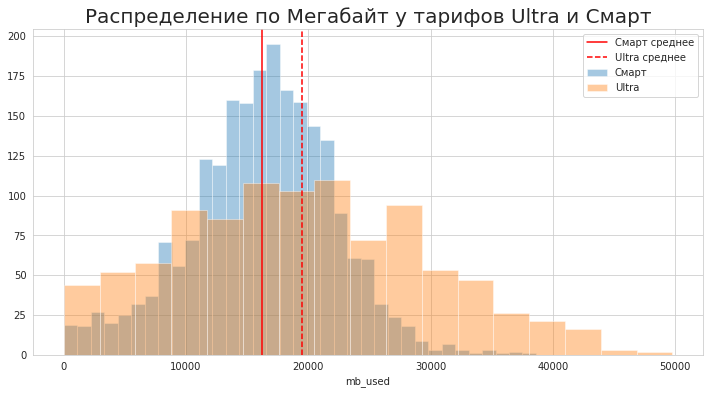

In [81]:
hist_tariffs('mb_used', 'Распределение по Мегабайт у тарифов Ultra и Смарт')

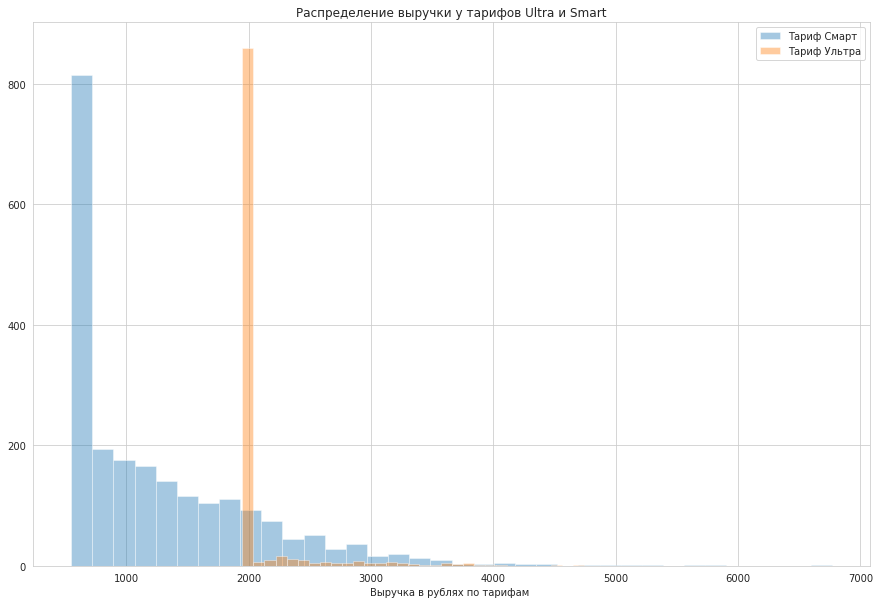

In [82]:
plt.figure(figsize = (15,10))
plt.title('Распределение выручки у тарифов Ultra и Smart', fontsize = 12)
ax = sns.distplot(a=smart['total_rub_per_month'], label='Тариф Смарт', kde=False)
ax = sns.distplot(a=ultra['total_rub_per_month'], label='Тариф Ультра', kde=False)
ax.set(xlabel='Выручка в рублях по тарифам ')
plt.legend()

### Вывод по анализу данных

Те, кто пользуется тарифом Ультра, платят в ~6 раз меньше на дополнительные услуги и при этом они судя по total_rub_per_month более активны. ,Для абонента получается выгоднее тариф Смарт, так как они тратят меньше денегв конечном итоге.

Пользователи тарифа Смарт в среднем тратят 400 мин, тарифа Ultra около 500 мин; пользователи тарифа Смарт пишут в среднем 33 сообщения, тарифа Ultra 49 сообщений; пользователи тарифа Смарт скачивают около 16000 мегабайт,  пользователи тарифа Ultra скачивают около 20 000 мегабайт

## Проверка гипотез

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средняя выручка пользователей тарифов Смарт и Ультра не различается
- Альтернативная гипотеза H₁: Средняя выручка пользователей тарифов Смарт и Ультра различается

In [83]:
alpha = 0.05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(smart['total_rub_per_month'], ultra['total_rub_per_month'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.009674149482176e-180
Отвергаем нулевую гипотезу


проверим гипотезу по выручке от каждого пользователя в месяц

In [84]:
calls_count = calls.pivot_table(index=['month', 'user_id'], values='duration', aggfunc=['count', 'sum']).rename(columns={'duration': 'total_calls'})
calls_count

count         sum
              total_calls total_calls
month user_id                        
1     1005             15          99
      1032             61         397
      1045              1           9
      1055             64         568
      1071             24         200
...                   ...         ...
12    1494             62         426
      1495            155        1066
      1496             80         533
      1497             71         558
      1499             69         505

[3174 rows x 2 columns]

In [85]:
# Создадим временный DataFrame c таблицей calls
tempdf = pd.DataFrame(calls_count.to_records())
tempdf

,month,user_id,"('count', 'total_calls')","('sum', 'total_calls')"
0,1,1005,15,99
1,1,1032,61,397
2,1,1045,1,9
3,1,1055,64,568
4,1,1071,24,200
...,...,...,...,...
3169,12,1494,62,426
3170,12,1495,155,1066
3171,12,1496,80,533
3172,12,1497,71,558


In [86]:
# создадим датафрейм для вычисления выручки от каждого пользователя
profit_per_month = pd.DataFrame()
profit_per_month['user_id'] = tempdf['user_id']
profit_per_month['month'] = tempdf['month']
profit_per_month['calls'] = user_cost['calls']
profit_per_month['minutes'] = user_cost['minutes']

In [87]:
profit_per_month

,user_id,month,calls,minutes
0,1005,1,15,99
1,1032,1,61,397
2,1045,1,1,9
3,1055,1,64,568
4,1071,1,24,200
...,...,...,...,...
3169,1494,12,62,426
3170,1495,12,155,1066
3171,1496,12,80,533
3172,1497,12,71,558


In [88]:
# новый датафрейм с таблицей messages, переименуем столбец id  в messages
tempdf = pd.DataFrame(messages_per_month.to_records()).rename(columns={'id': 'messages'})
tempdf

,month,user_id,messages
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16
...,...,...,...
2712,12,1493,78
2713,12,1495,84
2714,12,1496,51
2715,12,1497,17


In [89]:
# Соединим новый датафрейм с нашим profit_per_month таблицей
profit_per_month = profit_per_month.merge(tempdf, on=['user_id', 'month'], how='outer')
profit_per_month

,user_id,month,calls,minutes,messages
0,1005,1,15.0,99.0,7.0
1,1032,1,61.0,397.0,38.0
2,1045,1,1.0,9.0,5.0
3,1055,1,64.0,568.0,30.0
4,1071,1,24.0,200.0,16.0
...,...,...,...,...,...
3208,1106,12,NaN,NaN,24.0
3209,1231,12,NaN,NaN,191.0
3210,1328,12,NaN,NaN,7.0
3211,1473,12,NaN,NaN,20.0


In [90]:
# новый временный датафрейм с таблицей internet_per_month и соединим его с нашим profit_per_month таблицей
tempdf = pd.DataFrame(internet_per_month.to_records())
profit_per_month = profit_per_month.merge(tempdf, on=['user_id', 'month'], how='outer')
profit_per_month

,user_id,month,calls,minutes,messages,mb_used
0,1005,1,15.0,99.0,7.0,2730.0
1,1032,1,61.0,397.0,38.0,24158.0
2,1045,1,1.0,9.0,5.0,2348.0
3,1055,1,64.0,568.0,30.0,17115.0
4,1071,1,24.0,200.0,16.0,15625.0
...,...,...,...,...,...,...
3209,1231,12,NaN,NaN,191.0,32483.0
3210,1328,12,NaN,NaN,7.0,39465.0
3211,1473,12,NaN,NaN,20.0,18433.0
3212,1489,12,NaN,NaN,35.0,17349.0


In [91]:
# новый датафрейм tariff_t и перенесем в него столбцы из таблицы users далее соединим с profit_per_month таблицей
tariff_t = pd.DataFrame()
tariff_t[['user_id','tariff','city','age']] = users[['user_id','tariff','city','age']]
profit_per_month = profit_per_month.merge(tariff_t, on='user_id', how='outer')
profit_per_month

,user_id,month,calls,minutes,messages,mb_used,tariff,city,age
0,1005,1.0,15.0,99.0,7.0,2730.0,smart,набережные челны,67
1,1005,2.0,69.0,470.0,38.0,7396.0,smart,набережные челны,67
2,1005,3.0,77.0,620.0,56.0,11120.0,smart,набережные челны,67
3,1005,4.0,101.0,736.0,41.0,9371.0,smart,набережные челны,67
4,1005,5.0,73.0,606.0,42.0,7882.0,smart,набережные челны,67
...,...,...,...,...,...,...,...,...,...
3211,1328,10.0,NaN,NaN,6.0,22449.0,ultra,мурманск,44
3212,1328,11.0,NaN,NaN,8.0,35570.0,ultra,мурманск,44
3213,1328,12.0,NaN,NaN,7.0,39465.0,ultra,мурманск,44
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,волжский,51


In [92]:
profit_per_month.isnull().sum()

user_id       0
month         2
calls        42
minutes      42
messages    499
mb_used      13
tariff        0
city          0
age           0
dtype: int64

In [93]:
profit_per_month = profit_per_month.fillna(0)

In [94]:
# Обозначим следующие переменные с ценами и включенными пакетами по тарифам
smart_megabytes_included = 15360
smart_messages_included = 50
smart_minutes_included = 500
smart_monthly_price = 550
smart_price_for_megabyte = 0.1953
smart_price_for_message = 3
smart_price_for_minute = 3

In [95]:
ultra_megabytes_included = 30720
ultra_messages_included = 1000
ultra_minutes_included = 3000
ultra_monthly_price = 1950
ultra_price_for_megabyte = 0.1464
ultra_price_for_message = 1
ultra_price_for_minute = 1

In [96]:
# Напишем функцию для подсчета прибыли 
def profit_function(row):    # Обозначим следующие переменные из столбцов таблицы
    mb_used = row['mb_used']
    tariff = row['tariff']
    minutes = row['minutes']
    messages = row['messages']
    total_megabytes = 0
    total_messages = 0 
    total_minutes = 0
    
    if tariff == 'smart':
        if mb_used > smart_megabytes_included:
            total_megabytes = (mb_used - smart_megabytes_included) * smart_price_for_megabyte
        if minutes > smart_minutes_included:
            total_minutes = (minutes - smart_minutes_included) * smart_price_for_minute
        if messages > smart_messages_included:
            total_messages = (messages - smart_messages_included) * smart_price_for_message
        
        return total_megabytes + total_minutes + total_messages + smart_monthly_price
    
    if tariff == 'ultra':
        if mb_used > ultra_megabytes_included:
            total_megabytes = (mb_used - ultra_megabytes_included) * ultra_price_for_megabyte
        if minutes > ultra_minutes_included:
            total_minutes = (minutes - ultra_minutes_included) * ultra_price_for_minute
        if messages > ultra_messages_included:
            total_messages = (messages - ultra_messages_included) * ultra_price_for_message
        return total_megabytes + total_minutes + total_messages + ultra_monthly_price

In [97]:
profit_per_month['profit'] = profit_per_month.apply(profit_function, axis = 1)

In [98]:
profit_per_month

,user_id,month,calls,minutes,messages,mb_used,tariff,city,age,profit
0,1005,1.0,15.0,99.0,7.0,2730.0,smart,набережные челны,67,550.000
1,1005,2.0,69.0,470.0,38.0,7396.0,smart,набережные челны,67,550.000
2,1005,3.0,77.0,620.0,56.0,11120.0,smart,набережные челны,67,928.000
3,1005,4.0,101.0,736.0,41.0,9371.0,smart,набережные челны,67,1258.000
4,1005,5.0,73.0,606.0,42.0,7882.0,smart,набережные челны,67,868.000
...,...,...,...,...,...,...,...,...,...,...
3211,1328,10.0,0.0,0.0,6.0,22449.0,ultra,мурманск,44,1950.000
3212,1328,11.0,0.0,0.0,8.0,35570.0,ultra,мурманск,44,2660.040
3213,1328,12.0,0.0,0.0,7.0,39465.0,ultra,мурманск,44,3230.268
3214,1128,0.0,0.0,0.0,0.0,0.0,ultra,волжский,51,1950.000


In [99]:
# Посчитаем данные по выручке от каждого пользователя 
ultra_revenue = profit_per_month[profit_per_month['tariff']=='ultra']['profit']
smart_revenue = profit_per_month[profit_per_month['tariff']=='smart']['profit']

In [100]:
ultra_revenue

68      1950.000
69      1950.000
70      1950.000
71      1950.000
72      1950.000
          ...   
3205    1950.000
3211    1950.000
3212    2660.040
3213    3230.268
3214    1950.000
Name: profit, Length: 986, dtype: float64

In [101]:
smart_revenue

0        550.0000
1        550.0000
2        928.0000
3       1258.0000
4        868.0000
          ...    
3207     918.3358
3208    1377.8767
3209     973.0198
3210     938.4517
3215     550.0000
Name: profit, Length: 2230, dtype: float64

In [102]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(ultra_revenue, smart_revenue)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.118812366381322e-180
Отвергаем нулевую гипотезу


средняя выручка в тарифах ультра и смарт различается. Отвергаем нулевую гипотезу

Сформулируем нулевые гипотезы :

- Нулевая гипотеза H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- Альтернативная гипотеза H₁: Средняя выручка пользователей ииз Москвы отличается от выручки пользователей из других регионов

In [103]:
moscow_city = profit_per_month[profit_per_month['city']=='москва'].profit
others_city = profit_per_month[profit_per_month['city']!='москва'].profit

In [104]:
#Выполним проверку гипотезы.

alpha = .05

results = st.ttest_ind(moscow_city, others_city)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5185594755046896
Не получилось отвергнуть нулевую гипотезу


Вероятность получить одинаковую среднюю выручку составляет 0.51 - это большая вероятность следовательно гипотеза не подтвердилась и средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

In [105]:
profit_per_month

,user_id,month,calls,minutes,messages,mb_used,tariff,city,age,profit
0,1005,1.0,15.0,99.0,7.0,2730.0,smart,набережные челны,67,550.000
1,1005,2.0,69.0,470.0,38.0,7396.0,smart,набережные челны,67,550.000
2,1005,3.0,77.0,620.0,56.0,11120.0,smart,набережные челны,67,928.000
3,1005,4.0,101.0,736.0,41.0,9371.0,smart,набережные челны,67,1258.000
4,1005,5.0,73.0,606.0,42.0,7882.0,smart,набережные челны,67,868.000
...,...,...,...,...,...,...,...,...,...,...
3211,1328,10.0,0.0,0.0,6.0,22449.0,ultra,мурманск,44,1950.000
3212,1328,11.0,0.0,0.0,8.0,35570.0,ultra,мурманск,44,2660.040
3213,1328,12.0,0.0,0.0,7.0,39465.0,ultra,мурманск,44,3230.268
3214,1128,0.0,0.0,0.0,0.0,0.0,ultra,волжский,51,1950.000


## Общий вывод

- Таблицы изучены, осуществлена проверка на дубликат ыи пустые значения , далее в предобработке тип данных сделан корректным.

- посчитано сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц, также осуществлен расчет дисперсии и стандартного отклонения

- гипотезы проверены с соответствующими выводами

Из двух поставленных гипотез подтвердилась одна. для оператора выгоден тариф Ультра, так как он приносит больше денег; для пользователя выгоден тариф Смарт, так как полного пакета достаточно длоя пользования.